# univarient anlaysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#downloading data using curlwget chrome extension
!wget --header="Host: query1.finance.yahoo.com" --header="User-Agent: Mozilla/5.0 (X11; CrOS x86_64 13816.82.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.218 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://finance.yahoo.com/quote/BHARTIARTL.NS/history?p=BHARTIARTL.NS" --header="Cookie: APID=UPae563c54-a8a1-11eb-918d-067c02a70026; B=9ltjes9g8iabo&b=3&s=qv; A1=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok; A3=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok; A1S=d=AQABBHgpiWACEBmWWufznGJ4Z0RGK-Ju9poFEgEBBAHssGB5YVlQb2UB_eMAAAcIeCmJYOJu9po&S=AQAAAlNMLNd04mLaVphdHqbF5Ok&j=WORLD; GUC=AQEBBAFgsOxheUIhUgTP; cmp=t=1622184749&j=0; APIDTS=1622184750; PRF=t%3DBHARTIARTL.NS%252BGOOG%252BFB" --header="Connection: keep-alive" "https://query1.finance.yahoo.com/v7/finance/download/BHARTIARTL.NS?period1=1590648773&period2=1622184773&interval=1d&events=history&includeAdjustedClose=true" -c -O 'BHARTIARTL.NS.csv'

--2021-05-28 09:34:02--  https://query1.finance.yahoo.com/v7/finance/download/BHARTIARTL.NS?period1=1590648773&period2=1622184773&interval=1d&events=history&includeAdjustedClose=true
Resolving query1.finance.yahoo.com (query1.finance.yahoo.com)... 69.147.80.15, 69.147.80.12, 2001:4998:64:800::6001, ...
Connecting to query1.finance.yahoo.com (query1.finance.yahoo.com)|69.147.80.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘BHARTIARTL.NS.csv’

BHARTIARTL.NS.csv       [ <=>                ]  18.43K  --.-KB/s    in 0.01s   

2021-05-28 09:34:02 (1.88 MB/s) - ‘BHARTIARTL.NS.csv’ saved [18869]



In [ ]:
df=pd.read_csv('/content/BHARTIARTL.NS.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-28,564.650024,568.000000,556.000000,562.750000,560.736389,16268836.0
1,2020-05-29,558.000000,564.000000,543.799988,552.599976,550.622681,54188806.0
2,2020-06-01,559.000000,561.650024,550.150024,559.049988,557.049622,39287024.0
3,2020-06-02,563.000000,572.299988,556.099976,558.099976,556.103027,31972728.0
4,2020-06-03,568.000000,568.299988,549.250000,551.650024,549.676147,29234914.0
...,...,...,...,...,...,...,...
247,2021-05-24,531.000000,533.000000,526.000000,526.799988,526.799988,6268351.0
248,2021-05-25,529.900024,530.799988,524.500000,526.099976,526.099976,9239443.0
249,2021-05-26,529.000000,530.799988,525.000000,525.750000,525.750000,6781577.0
250,2021-05-27,526.099976,527.000000,518.700012,519.799988,519.799988,22363299.0


we are taking only open feature and predicting its future( uni varient analysis )

In [ ]:
df1=df[['Open']]



In [ ]:
dfnew=df1.dropna()

In [ ]:
dfnew

,Open
0,564.650024
1,558.000000
2,559.000000
3,563.000000
4,568.000000
...,...
247,531.000000
248,529.900024
249,529.000000
250,526.099976


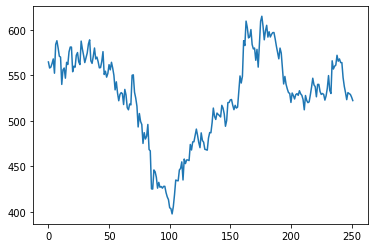

In [ ]:
plt.plot(dfnew)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
#splitting of data into train and test
train=dfnew[0:180]
test=dfnew[180:]

In [ ]:
train.shape,test.shape

((180, 1), (71, 1))

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scale_train=scaler.fit_transform(train)


In [ ]:
#preparing traing data we are taking first 40 values to predict next values
x=[]
y=[]
for i in range(40,len(scale_train)):
  x.append(scale_train[i-40:i])
  y.append(scale_train[i,0])
  xtrain=np.array(x)
  ytrain=np.array(y)

In [ ]:
xtrain.shape      , ytrain.shape

((140, 40, 1), (140,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

In [ ]:
model=Sequential()

model.add(LSTM(100,input_shape=(40,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.fit(xtrain,ytrain,epochs=100,batch_size=32)

Epoch 1/100
5/5 [==============================] - 2s 28ms/step - loss: 0.3300
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.2112
Epoch 3/100
5/5 [==============================] - 0s 30ms/step - loss: 0.1276
Epoch 4/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0385
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0229
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0282
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0260
Epoch 8/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0152
Epoch 9/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0145
Epoch 10/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0138
Epoch 11/100
5/5 [==============================] - 0s 29ms/step - loss: 0.0113
Epoch 12/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0103
Epoch 13/100
5/5 [==============================]

In [ ]:
test

,Open
181,592.000000
182,597.849976
183,592.099976
184,595.000000
185,596.950012
...,...
247,531.000000
248,529.900024
249,529.000000
250,526.099976


In [ ]:
#preparing test data same as train data
last_40_days=train.tail(40)

In [ ]:
new_test=last_40_days.append(test,ignore_index=False )

In [ ]:
new_test

,Open
141,505.850006
142,504.200012
143,517.000000
144,513.900024
145,507.500000
...,...
247,531.000000
248,529.900024
249,529.000000
250,526.099976


In [ ]:
scale_test=scaler.transform(new_test)

In [ ]:
w=[]
f=[]
for i in range(40,len(scale_test)):
  w.append(scale_train[i-40:i])
  f.append(scale_train[i,0])
  xtest=np.array(w)
  ytest=np.array(f)

In [ ]:
xtest.shape,ytest.shape

((71, 40, 1), (71,))

In [ ]:
y_pred=model.predict(xtest)

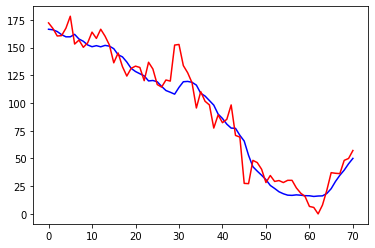

In [ ]:
plt.plot(y_pred,color="b")
plt.plot(ytest,color='r')


In [ ]:
scaler.scale_

array([0.00460405])

In [ ]:
scale=1/0.00460405

In [ ]:
scale

217.2000738480251

In [ ]:
y_pred = y_pred*scale
ytest = ytest*scale

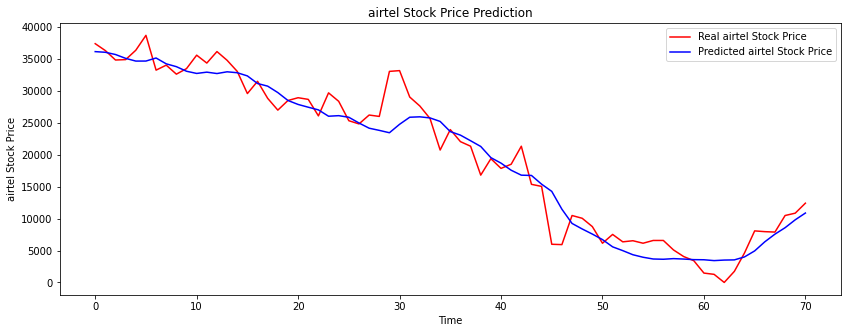

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(ytest, color = 'red', label = 'Real airtel Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted airtel Stock Price')
plt.title('airtel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('airtel Stock Price')
plt.legend()
plt.show()

**Conclusion:-**

As we can see we have predicted almost correct. we can get very good prediction by fine tunning model